In [30]:
import os 
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [31]:
import numpy as np

import pandas as pd
from src.astroML.datasets.tools.download import download_with_progress_bar

import astroquery
from astroquery.sdss import SDSS
from astropy.table import Table
from astropy.io import fits

In [32]:
nonbal_qso_samp_path = '../data/nonbal_qso_samp.csv'
nonbal_qso_samp_df = pd.read_csv(nonbal_qso_samp_path, index_col=0)

In [33]:
nonbal_qso_samp_df.iloc[[0]]

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,Z,BAL_PROB,BI_CIV,AI_CIV
0,111438.82+360548.1,168.661785,36.09672,4622,55629,228,QSO,2.468,0.0,0.0,0.0


In [34]:
# hdul = SDSS.get_spectra(plate = nonbal_qso_samp_df.iloc[[0]].PLATE,
#                 mjd = nonbal_qso_samp_df.iloc[[0]].MJD,
#                 fiberID = nonbal_qso_samp_df.iloc[[0]].FIBERID,
#                 data_release=16)[0]

In [35]:
# hdul[0].header

In [36]:
# hdul[0].header['COEFF0']

In [37]:
# hdul['SPZLINE'].data

In [38]:
# hdul['SPALL'].data

In [39]:
# np.array(hdul['SPZLINE'].data['LINENAME'])

In [40]:
# hdul['SPZLINE'].header

In [41]:
# download_url = 'https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/full/6255/spec-6255-56240-0001.fits'



# buffer = download_with_progress_bar(download_url, return_buffer=True)

In [81]:
import sys
from urllib.error import HTTPError
import numpy as np
# from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets.tools import query_plate_mjd_fiber, TARGET_GALAXY
# from astroML.dimensionality import iterative_pca

from src.astroML.datasets.tools.sdss_fits import SDSSfits, sdss_fits_filename, sdss_fits_url
from src.astroML.dimensionality.iterative_pca import iterative_pca

In [43]:
plate = nonbal_qso_samp_df.iloc[[0]].PLATE.values[0]
mjd = nonbal_qso_samp_df.iloc[[0]].MJD.values[0]
fiberID = nonbal_qso_samp_df.iloc[[0]].FIBERID.values[0]

In [44]:
print(plate, mjd, fiberID)

4622 55629 228


In [45]:
from src.astroML.datasets.tools.sdss_fits import sdss_fits_url

In [46]:
sdss_fits_url(plate, mjd, fiberID)

'https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4622/spec-4622-55629-0228.fits'

In [47]:
from src.astroML.datasets.sdss_spectrum import fetch_sdss_spectrum

In [48]:
from src.astroML.datasets.tools.utils import get_data_home

In [49]:
get_data_home()

'/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data'

In [50]:
hdul = fits.open('../data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits')

In [51]:
hdul[1].data

FITS_rec([( 1.3906467e+01, 3.5502, 0.00538432, 0, 71303168, 1.221097 , 16.745302 , 1.0590584 ),
          ( 4.8436441e+00, 3.5503, 0.        , 0, 71303168, 1.2058588, 17.773693 , 1.0709941 ),
          (-4.2167773e+00, 3.5504, 0.02030968, 0, 71303168, 1.205564 , 18.66139  , 1.0663811 ),
          ...,
          ( 1.1841333e+00, 4.0138, 0.26759455, 0,   589824, 0.8665373,  5.9967246, 0.34624752),
          (-4.5755021e-03, 4.0139, 0.2625426 , 0,        0, 0.8689509,  9.184602 , 0.34400997),
          ( 1.9057959e+00, 4.014 , 0.22928058, 0, 33554432, 0.86918  , 12.828738 , 0.3517967 )],
         dtype=(numpy.record, [('FLUX', '>f4'), ('LOGLAM', '>f4'), ('IVAR', '>f4'), ('AND_MASK', '>i4'), ('OR_MASK', '>i4'), ('WDISP', '>f4'), ('SKY', '>f4'), ('MODEL', '>f4')]))

In [52]:
spec = fetch_sdss_spectrum(plate=nonbal_qso_samp_df.iloc[[0]].PLATE.values[0],
                           mjd=nonbal_qso_samp_df.iloc[[0]].MJD.values[0],
                           fiber=nonbal_qso_samp_df.iloc[[0]].FIBERID.values[0],
                           z=nonbal_qso_samp_df.iloc[[0]].Z.values[0],
                           sdss_class=nonbal_qso_samp_df.iloc[[0]].AUTOCLASS_PQN.values[0])




/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits


/Users/dangause/Desktop/personal_projects/qso_cv/src/astroML/datasets/tools/sdss_fits.py:112: RuntimeWarning: divide by zero encountered in divide
  self.error = np.sqrt(np.abs(1/data['ivar']))


In [53]:
spec.z

2.468

In [54]:
nonbal_qso_samp_df

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,Z,BAL_PROB,BI_CIV,AI_CIV
0,111438.82+360548.1,168.661785,36.096720,4622,55629,228,QSO,2.468000,0.0,0.0,0.0
1,152538.86+100329.5,231.411935,10.058197,5493,56009,344,QSO,2.241000,0.0,0.0,0.0
2,012017.97+214854.4,20.074892,21.815122,5134,55868,866,QSO,2.774000,0.0,0.0,0.0
3,232436.84+175513.8,351.153518,17.920526,6131,56211,476,QSO,2.275000,0.0,0.0,0.0
4,103619.33+105232.4,159.080553,10.875686,5346,55955,784,QSO,3.092000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,112048.90+143625.4,170.203752,14.607079,5367,55986,248,QSO,2.699000,0.0,0.0,0.0
7996,222607.53+230246.5,336.531390,23.046273,7583,56958,988,QSO,1.712627,0.0,0.0,0.0
7997,013012.41+302637.8,22.551726,30.443851,7730,58107,644,QSO,1.747934,0.0,0.0,0.0
7998,105849.70+001040.4,164.707087,0.177899,3836,55302,653,QSO,2.539000,0.0,0.0,0.0


In [56]:

# df = nonbal_qso_samp_df.iloc[0:2].reset_index(drop=True)

# loglam_start=3.5
# loglam_end=3.9
# Nlam=1000
# n_spectra=len(df)

# plate = df.PLATE
# mjd = df.MJD
# fiber = df.FIBERID
# z = df.Z
# sdss_class = df.AUTOCLASS_PQN

# # Set up arrays to hold information gathered from the spectra
# spec_cln = np.zeros(n_spectra, dtype=np.int32)
# lineindex_cln = np.zeros(n_spectra, dtype=np.int32)

# log_NII_Ha = np.zeros(n_spectra, dtype=np.float32)
# log_OIII_Hb = np.zeros(n_spectra, dtype=np.float32)

# z = np.zeros(n_spectra, dtype=np.float32)
# zerr = np.zeros(n_spectra, dtype=np.float32)
# spectra = np.zeros((n_spectra, Nlam), dtype=np.float32)
# mask = np.zeros((n_spectra, Nlam), dtype=bool)

# # Calculate new wavelength coefficients
# new_coeff0 = loglam_start
# new_coeff1 = (loglam_end - loglam_start) / Nlam

# # Now download all the needed spectra, and resample to a common
# #  wavelength bin.
# # n_spectra = len(plate)
# num_skipped = 0
# i = 0

# while i < n_spectra:
#     sys.stdout.write(' %i / %i spectra\r' % (i + 1, n_spectra))
#     sys.stdout.flush()
#     try:
#         spec = fetch_sdss_spectrum(plate[i], mjd[i], fiber[i], z[i], sdss_class[i])
#     except HTTPError:
#         num_skipped += 1
#         print("%i, %i, %i not found" % (plate[i], mjd[i], fiber[i]))
#         i += 1
#         continue

#     spec_rebin = spec.restframe().rebin(new_coeff0, new_coeff1, Nlam)

#     if np.all(spec_rebin.spectrum == 0):
#         num_skipped += 1
#         print("%i, %i, %i is all zero" % (plate[i], mjd[i], fiber[i], ))
#         i += 1
#         continue

#     z[i] = spec.z

#     spectra[i] = spec_rebin.spectrum
#     mask[i] = spec_rebin.compute_mask(0.5, 5)

#     i += 1
# sys.stdout.write('\n')

# N = i
# print("   %i spectra skipped" % num_skipped)
# print("   %i spectra processed" % N)
# print("saving to %s" % outfile)

# np.savez(outfile,
#             spectra=spectra[:N],
#             mask=mask[:N],
#             coeff0=new_coeff0,
#             coeff1=new_coeff1,
#             spec_cln=spec_cln[:N],
#             lineindex_cln=lineindex_cln[:N],
#             log_NII_Ha=log_NII_Ha[:N],
#             log_OIII_Hb=log_OIII_Hb[:N],
#             z=z[:N],
#             zerr=zerr[:N])

In [99]:
import sys
from urllib.error import HTTPError
import numpy as np
# from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets.tools import query_plate_mjd_fiber, TARGET_GALAXY
# from astroML.dimensionality import iterative_pca


def fetch_and_shift_spectra(df,
                            outfile,
                            loglam_start=3.5,
                            loglam_end=3.9,
                            Nlam=1000):
    """
    This function queries CAS for matching spectra, and then downloads
    them and shifts them to a common redshift binning
    """

    loglam_start=loglam_start
    loglam_end=loglam_end
    Nlam=Nlam
    n_spectra=len(df)

    plate = df.PLATE
    mjd = df.MJD
    fiber = df.FIBERID
    z = df.Z
    sdss_class = df.AUTOCLASS_PQN

    z = np.zeros(n_spectra, dtype=np.float32)
    # zerr = np.zeros(n_spectra, dtype=np.float32)
    spectra = np.zeros((n_spectra, Nlam), dtype=np.float32)
    mask = np.zeros((n_spectra, Nlam), dtype=bool)

    # Calculate new wavelength coefficients
    new_coeff0 = loglam_start
    new_coeff1 = (loglam_end - loglam_start) / Nlam

    # Now download all the needed spectra, and resample to a common
    #  wavelength bin.
    # n_spectra = len(plate)
    num_skipped = 0
    i = 0

    while i < n_spectra:
        sys.stdout.write(' %i / %i spectra\r' % (i + 1, n_spectra))
        sys.stdout.flush()
        try:
            spec = fetch_sdss_spectrum(plate[i], mjd[i], fiber[i], z[i], sdss_class[i])
        except HTTPError:
            num_skipped += 1
            print("%i, %i, %i not found" % (plate[i], mjd[i], fiber[i]))
            i += 1
            continue

        spec_rebin = spec.restframe().rebin(new_coeff0, new_coeff1, Nlam)

        if np.all(spec_rebin.spectrum == 0):
            num_skipped += 1
            print("%i, %i, %i is all zero" % (plate[i], mjd[i], fiber[i], ))
            i += 1
            continue

        z[i] = spec.z

        spectra[i] = spec_rebin.spectrum
        mask[i] = spec_rebin.compute_mask(0.5, 5)

        i += 1
    sys.stdout.write('\n')

    N = i
    print("   %i spectra skipped" % num_skipped)
    print("   %i spectra processed" % N)
    print("saving to %s" % outfile)

    np.savez(outfile,
                spectra=spectra[:N],
                mask=mask[:N],
                coeff0=new_coeff0,
                coeff1=new_coeff1,
                # spec_cln=spec_cln[:N],
                # lineindex_cln=lineindex_cln[:N],
                # log_NII_Ha=log_NII_Ha[:N],
                # log_OIII_Hb=log_OIII_Hb[:N],
                z=z[:N],
                # zerr=zerr[:N]
                )



In [100]:
test_df = nonbal_qso_samp_df.iloc[0:10]


outfile_path = '../data/astroML_data/pre_pca.npz'

fetch_and_shift_spectra(test_df, outfile_path)

/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits


/Users/dangause/Desktop/personal_projects/qso_cv/src/astroML/datasets/tools/sdss_fits.py:112: RuntimeWarning: divide by zero encountered in divide
  self.error = np.sqrt(np.abs(1/data['ivar']))


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5134/spec-5134-55868-0866.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5134/spec-5134-55868-0866.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6131/spec-6131-56211-0476.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6131/spec-6131-56211-0476.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0784.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0784.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/7850/spec-7850-56956-0216.fits
/Users/dangause/Desktop/personal_proj

In [101]:
def spec_iterative_pca(outfile, n_ev=10, n_iter=20, norm='L2'):
    """
    This function takes the file outputted above, performs an iterative
    PCA to fill in the gaps, and appends the results to the same file.
    """
    data_in = np.load(outfile)
    spectra = data_in['spectra']
    mask = data_in['mask']
    mask = np.full((mask.shape[0], mask.shape[1]), False)

    res = iterative_pca(spectra, mask,
                        n_ev=n_ev, n_iter=n_iter, norm=norm,
                        full_output=True)

    input_dict = {key: data_in[key] for key in data_in.files}

    # don't save the reconstructed spectrum: this can easily
    # be recomputed from the other parameters.
    input_dict['mu'] = res[1]
    input_dict['evecs'] = res[2]
    input_dict['evals'] = res[3]
    input_dict['norms'] = res[4]
    input_dict['coeffs'] = res[5]

    np.savez(outfile, **input_dict)

In [102]:
spec_iterative_pca(outfile_path)

 PCA iteration 20 / 20


/Users/dangause/Desktop/personal_projects/qso_cv/src/astroML/dimensionality/iterative_pca.py:136: RuntimeWarning: invalid value encountered in divide
  ratio_i = X[i][notM[i]] / X_recons[i][notM[i]]


In [103]:
data_in = np.load(outfile_path)


In [104]:
data_in.keys()

KeysView(NpzFile '../data/astroML_data/pre_pca.npz' with keys: spectra, mask, coeff0, coeff1, z...)

In [105]:
from astroML.datasets import sdss_corrected_spectra 

In [106]:
# data = sdss_corrected_spectra.fetch_sdss_corrected_spectra(data_home='../data/astroML_data/pre_pca.npz', download_if_missing=False)
data = np.load(outfile_path)

In [107]:
data = np.load(outfile_path)

spectra = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)

In [108]:
from matplotlib import pyplot as plt

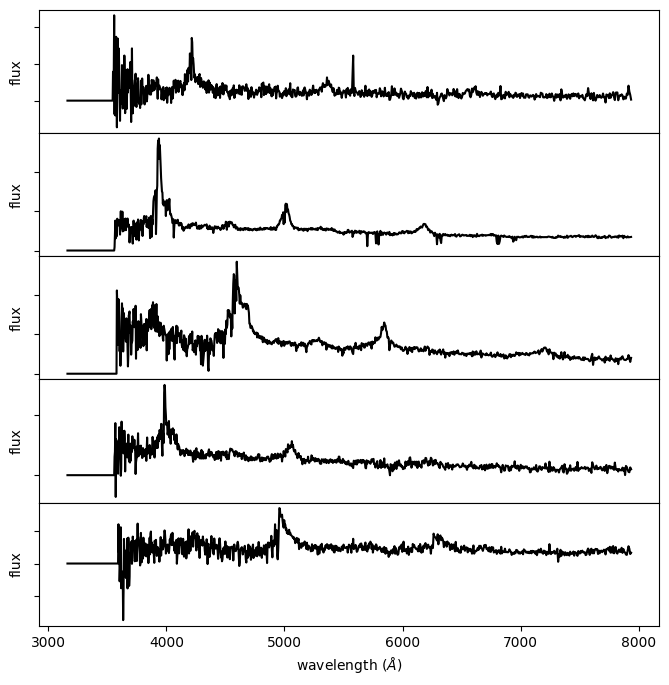

In [109]:
# Plot several spectra
fig = plt.figure(figsize=(8, 8))

fig.subplots_adjust(hspace=0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(lam, spectra[i], '-k')

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')

    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')

plt.show()

In [112]:
test_df = nonbal_qso_samp_df.iloc[0:20]


outfile_path = '../data/astroML_data/pre_pca.npz'

fetch_and_shift_spectra(test_df, outfile_path, loglam_start=3.55, loglam_end=3.9)

spec_iterative_pca(outfile_path)

data = np.load(outfile_path)

spectra = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)

/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5134/spec-5134-55868-0866.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5134/spec-5134-55868-0866.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6131/spec-6131-56211-0476.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6131/spec-6131-56211-0476.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5346/spec-5346-55955-0784.fits
/Users/dangause/Desktop/personal_proj

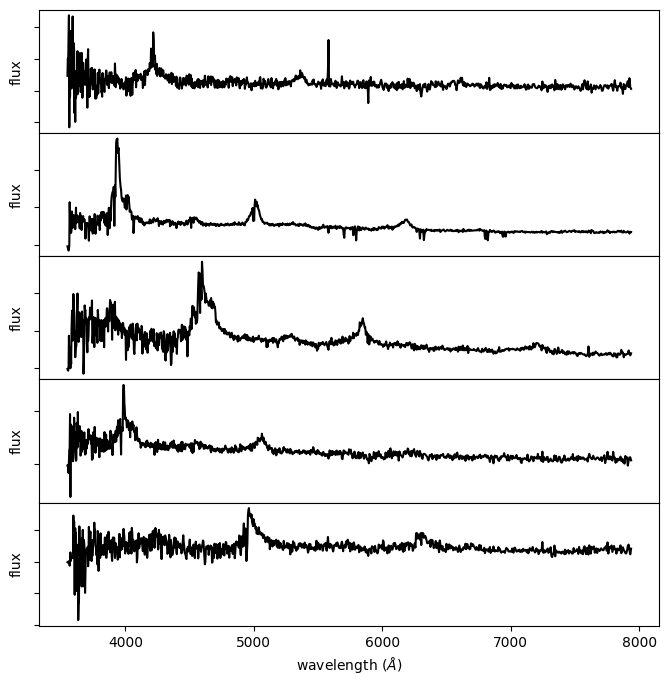

In [113]:
# Plot several spectra
fig = plt.figure(figsize=(8, 8))

fig.subplots_adjust(hspace=0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(lam, spectra[i], '-k')

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')

    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')

plt.show()